In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [162]:
df = pd.read_csv('./Amtrak.csv')

In [163]:
df

,M,Ridership
0,1991/01,1708.917
1,1991/02,1620.586
2,1991/03,1972.715
3,1991/04,1811.665
4,1991/05,1974.964
...,...,...
154,2003/11,2076.054
155,2003/12,2140.677
156,2004/01,1831.508
157,2004/02,1838.006


# 정상 시계열 vs 비정상 시계열

* 정상시계열

> 뚜렷한 추세가 없으며, 시계열의 평균이 시간 축에 평행한 경우

> 시계열의 변동이 시간의 흐름에 따라 일정하며, 시간이 지나도 분산이 일정한 경우

* 비정상시계열

> 뚜렷한 추세가 있으며, 시계열의 평균이 시간에 따라 다른 경우

> 특정한 변화 패턴이나, 계절성 그리고 분산이 시간에 따라 변하는 경우

* 비정상 시계열 데이터를 정상 시계열 데이터로 변화 시킨 후 모델링을 수행해야함



### 비정상 시계열 예시
> 삼성전자 주가 데이터

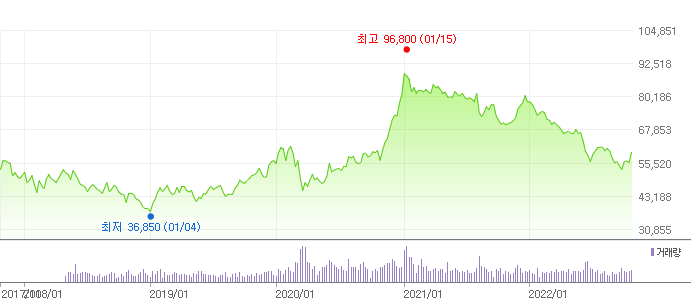

>평균이 시간에 따라 증가 혹은 감소

>추세가 존재함

>시계열의 변동 폭이 시간에 따라 다름

## 정상 시계열 예시
>실험에 활용할 데이터

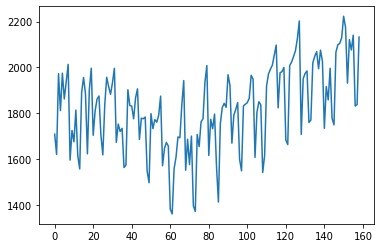

In [164]:
plt.plot(df['Ridership'])

## 

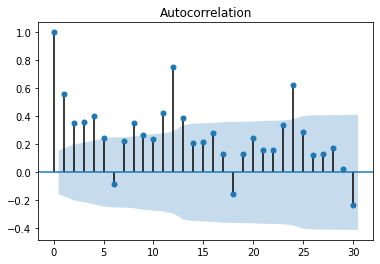

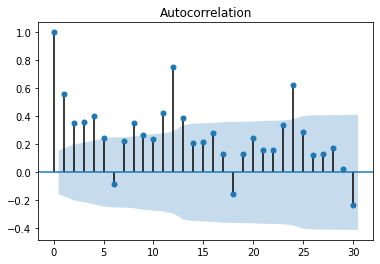

In [165]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Ridership'], lags = 30, use_vlines = True)

In [166]:
df['R'] = 0.0
for i in range(len(df)):
  try:
    df['R'][i] = df['Ridership'][i+1] - df['Ridership'][i]
  except:
    print(i)


158


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


###결론적으로 차분은 추세나 계절성을 없앨 수 있음

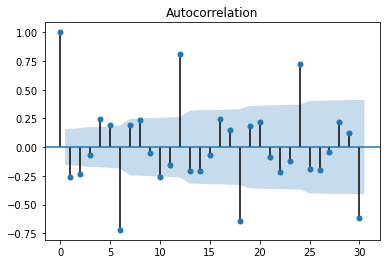

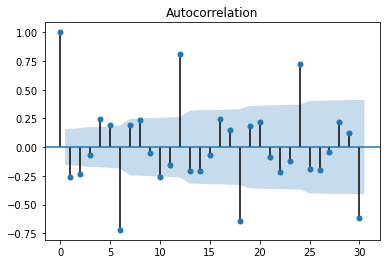

In [167]:
plot_acf(df['R'], lags = 30, use_vlines = True)

In [168]:
df['Ridership'].diff(periods = 1)

0          NaN
1      -88.331
2      352.129
3     -161.050
4      163.299
        ...   
154    -45.416
155     64.623
156   -309.169
157      6.498
158    294.440
Name: Ridership, Length: 159, dtype: float64

데이터를 만들어서 확인해보자.

In [169]:
data = list()
for i in range(100):
  data.append(i+np.random.normal(20, 20, 1))


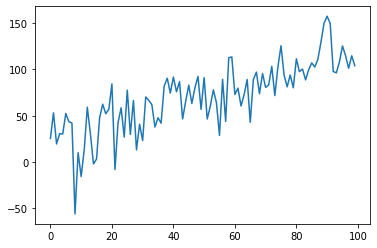

In [170]:
plt.plot(data)

이 경우에 acf plot의 그림은?

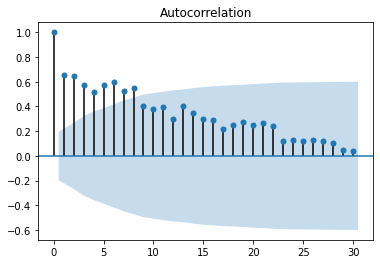

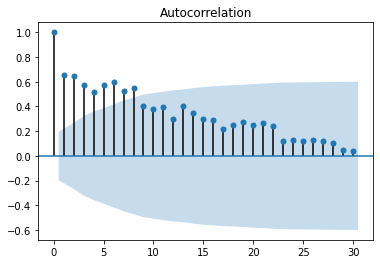

In [171]:
plot_acf(data, lags = 30, use_vlines = True)

###점차 낮게 떨어짐. 이는 이전 항과 다음 항이 상관관계를 가지고 있는 것이다.
* Autocorrelation

###그렇다면 차분을 통해 이러한 추세 및 계절성을 없앨 수 있을까?

>즉 정상성을 가지도록 변환할 수 있을까?

>실험해보면

In [172]:
Diff = pd.DataFrame(data, columns = ['rand']).diff(periods = 1)
Diff = Diff.drop(0).reset_index(drop=True)

##사용한 diff 함수: 차분을 구하는 것
>이는 t시점과 t-1시점의 차이를 계산한 것과 같음

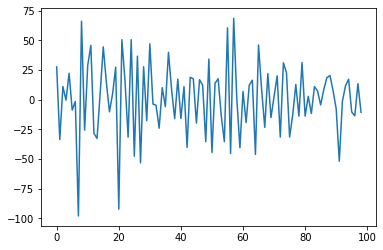

In [173]:
plt.plot(Diff['rand'])

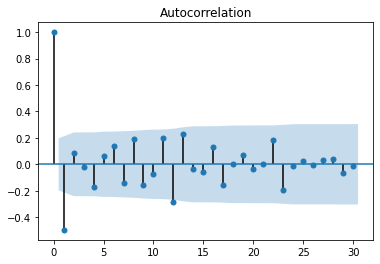

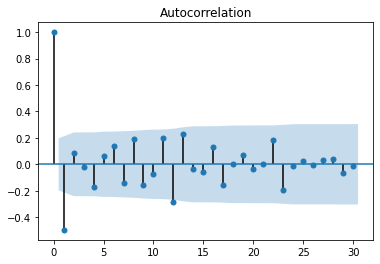

In [174]:
#Diff
plot_acf(Diff['rand'], lags = 30, use_vlines = True)

## 차분 전과 후의 정상성을 비교해보면?

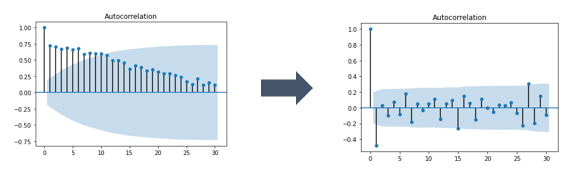


# 시계열 모델링 방법

* AR 모형: Autoregressive (자기상관) 이란 어떤 Random Variable에 대해서 이전의 값이 이후에 영향을 주는 상황을 이야기함.

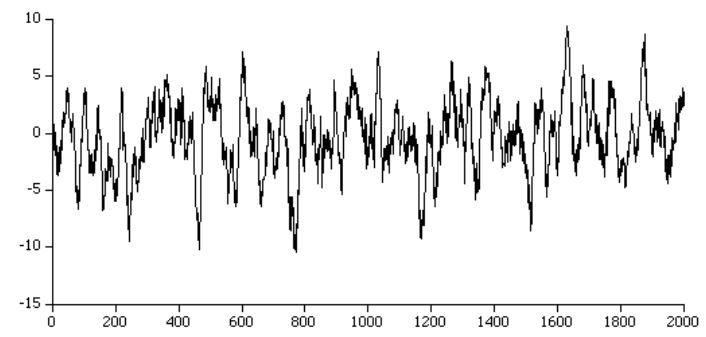

* MA 모형: Moving average(이동평균) 어떤 Random Variable 에 대해서 시간이 지날수록 평균값이 지속적으로 증가하거나 감소하는 경향성을 이동평균이라고 함.

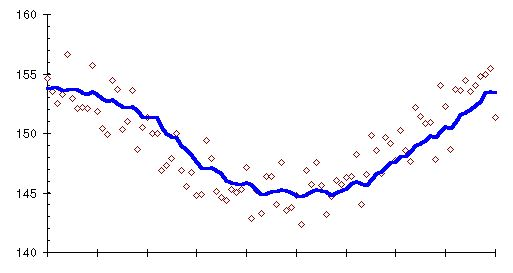

* Arima (Autoregressive Intergrated Moving Average) 모형: AR 모형과 모형에서 고려하는 요소와 과거의 데이터가 가지는 추세를 고려하여 시계열 모델링 하는 기법으로 3개의 파라미터로 (Arima(p,d,q)) 로 구성됨

> p: AR모형의 파라미터로써, p시점 전의 데이터가 현재의 데이터에 영향을 준다는 것을 의미함

> d: 정상시계열로 만들기 위해 필요한 차분의 수를 의미함

> q: MA 모형의 파라미터로써, 현재의 충격이 q 시점까지 영향을 남긴다는 것을 의미함

In [175]:
df = df[['M', 'Ridership']]
df

,M,Ridership
0,1991/01,1708.917
1,1991/02,1620.586
2,1991/03,1972.715
3,1991/04,1811.665
4,1991/05,1974.964
...,...,...
154,2003/11,2076.054
155,2003/12,2140.677
156,2004/01,1831.508
157,2004/02,1838.006


In [176]:
scaler = MinMaxScaler()
df['Ridership'] = scaler.fit_transform(df['Ridership'].values.reshape(-1, 1))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,M,Ridership
0,1991/01,0.403555
1,1991/02,0.301142
2,1991/03,0.709409
3,1991/04,0.522684
4,1991/05,0.712016
...,...,...
154,2003/11,0.829223
155,2003/12,0.904148
156,2004/01,0.545690
157,2004/02,0.553224


In [177]:
train = df.iloc[:int(len(df)*0.7), 1].to_numpy()
test = df.iloc[int(len(df)*0.7):, 1].to_numpy()
print(len(train))
print(len(test))

111
48


In [178]:
test

array([0.70799203, 0.73211733, 0.7523632 , 0.80364801, 0.85405399,
       0.53664419, 0.7143735 , 0.71948772, 0.74122113, 0.37367782,
       0.35078615, 0.75023565, 0.76862876, 0.79554596, 0.82558084,
       0.88796251, 0.97598716, 0.40213589, 0.68390267, 0.71045117,
       0.72333817, 0.46235175, 0.475066  , 0.76413019, 0.79715756,
       0.82076923, 0.73439676, 0.82829969, 0.77183805, 0.43281658,
       0.64454601, 0.57680548, 0.73681416, 0.4836898 , 0.45059519,
       0.81810603, 0.85570964, 0.8626801 , 0.89138745, 1.        ,
       0.94320096, 0.66151418, 0.88187901, 0.82922259, 0.90414807,
       0.54569001, 0.55322395, 0.89460485])

# ARIMA 라이브러리 불러오기

In [179]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order = (1, 1, 1))
model_fit = model.fit(trend = 'nc', full_output = True, disp = 1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  110
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  41.766
Method:                       css-mle   S.D. of innovations              0.164
Date:                Fri, 28 Oct 2022   AIC                            -77.533
Time:                        03:32:03   BIC                            -69.431
Sample:                             1   HQIC                           -74.247
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.3516      0.106      3.325      0.001       0.144       0.559
ma.L1.D.y     -0.9533      0.049    -19.387      0.000      -1.050      -0.857
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



In [180]:
pred, std, bound = model_fit.forecast(steps = len(test))

In [181]:
result = pd.DataFrame(pred, columns = ['Pred'])
result['Real'] = scaler.inverse_transform(test.reshape(-1, 1))
result['Pred'] = scaler.inverse_transform(result['Pred'].values.reshape(-1, 1))

In [182]:
result

,Pred,Real
0,1819.143857,1971.493
1,1783.848058,1992.301
2,1771.439033,2009.763
3,1767.076364,2053.996
4,1765.542570,2097.471
5,1765.003331,1823.706
6,1764.813749,1976.997
7,1764.747097,1981.408
8,1764.723665,2000.153
9,1764.715426,1683.148


In [183]:
train = scaler.inverse_transform(train.reshape(-1, 1))
test = scaler.inverse_transform(test.reshape(-1, 1))

In [184]:
train = train.reshape(-1)
test = test.reshape(-1)

In [185]:
result

,Pred,Real
0,1819.143857,1971.493
1,1783.848058,1992.301
2,1771.439033,2009.763
3,1767.076364,2053.996
4,1765.542570,2097.471
5,1765.003331,1823.706
6,1764.813749,1976.997
7,1764.747097,1981.408
8,1764.723665,2000.153
9,1764.715426,1683.148


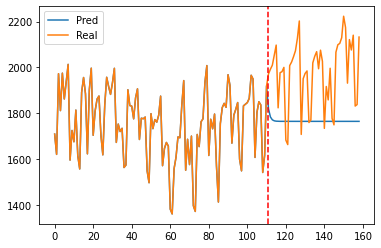

In [186]:
plt.plot(train.tolist()+result['Pred'].tolist(), label = 'Pred')
plt.plot(train.tolist()+result['Real'].tolist(), label = 'Real')
plt.legend()

plt.axvline(x = len(train), c = 'r', linestyle = '--')
plt.show()

Text(0, 0.5, 'Residual')

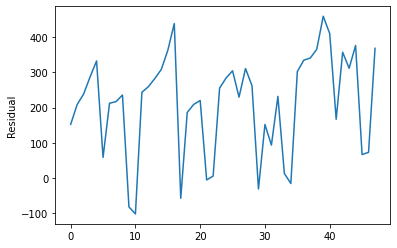

In [187]:
plt.plot(result['Real'] - result['Pred'])
plt.ylabel('Residual')